# <font size = 8 color = darkgreen ><b>Titanic Data EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
train = pd.read_csv('~/OneDrive/Emeritus/IITG-DSBA March 27th/Python/datasets/train.csv')
test = pd.read_csv('~/OneDrive/Emeritus/IITG-DSBA March 27th/Python/datasets/test.csv')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Detection missing 

In [13]:
((train.isna().sum()/ train.shape[0]) * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

if a column has has more than 30 % missing --> delete the column 

### Univariate - Target column analysis 

In [17]:
vc = train.Survived.value_counts()
vc

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
plt.bar(height = vc.values, x = vc.index)

<BarContainer object of 2 artists>

<Axes: xlabel='Survived'>

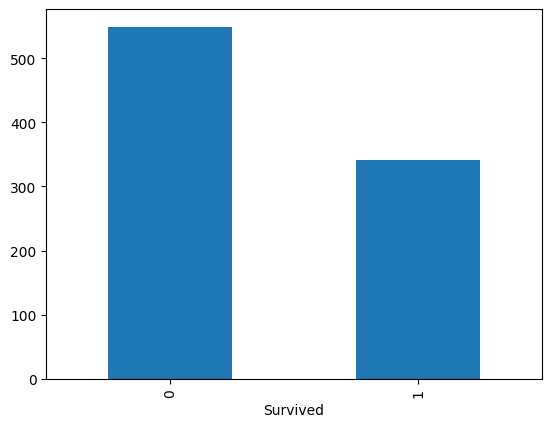

In [19]:
vc.plot.bar()

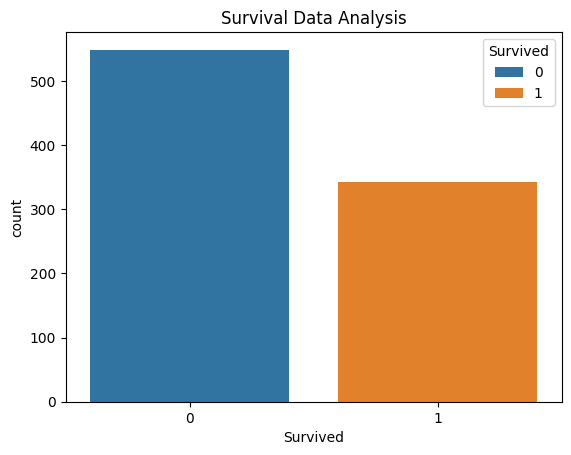

In [23]:
sns.countplot(x = 'Survived', hue = 'Survived', data = train)
plt.title('Survival Data Analysis')
plt.show()

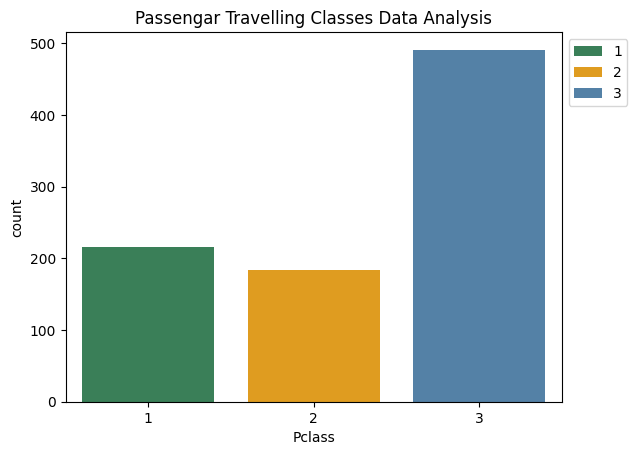

In [26]:
sns.countplot(x = 'Pclass', hue = 'Pclass', data = train, palette= ['seagreen', 'orange', 'steelblue'])
plt.legend(bbox_to_anchor= (1,1))
plt.title('Passengar Travelling Classes Data Analysis')
plt.show()

### Bivariate analysis : categorical + categorical

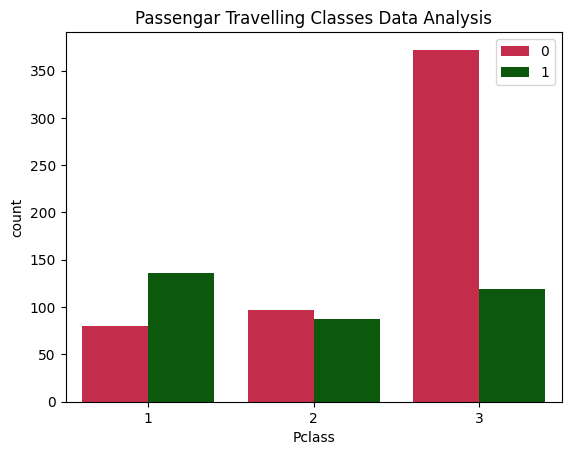

In [27]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train, palette= ['crimson', 'darkgreen'])
plt.legend(bbox_to_anchor= (1,1))
plt.title('Passengar Travelling Classes Data Analysis')
plt.show()

### Univariate : Quantitative

In [29]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
train[['Age', 'Fare']].describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

<Axes: xlabel='Age'>

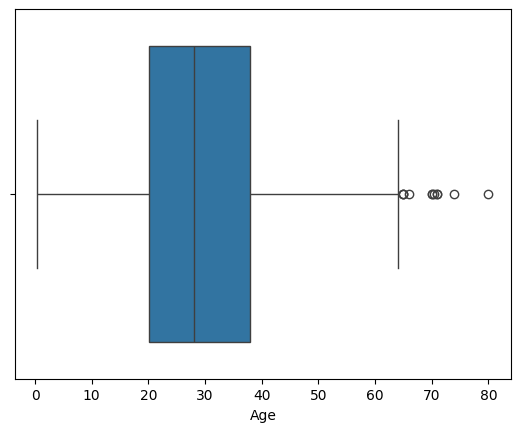

In [33]:
sns.boxplot(x = 'Age', data = train)

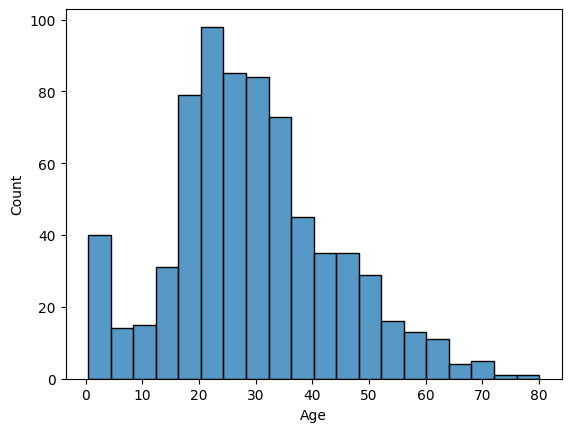

In [34]:
sns.histplot(x = 'Age', data = train)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

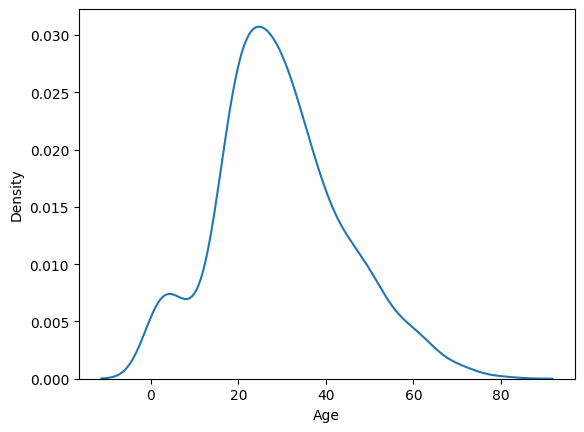

In [37]:
sns.kdeplot(x = 'Age', data = train)

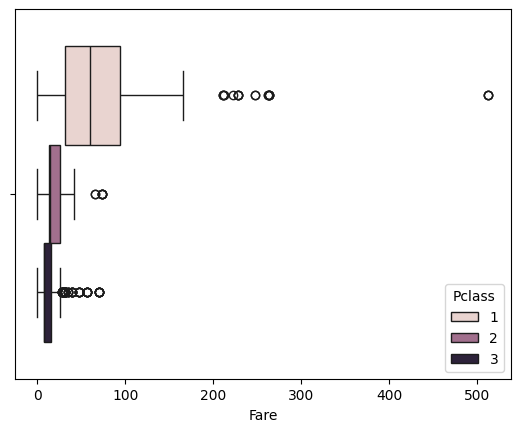

In [40]:
sns.boxplot(x = 'Fare', hue = 'Pclass' , data = train)
plt.show()

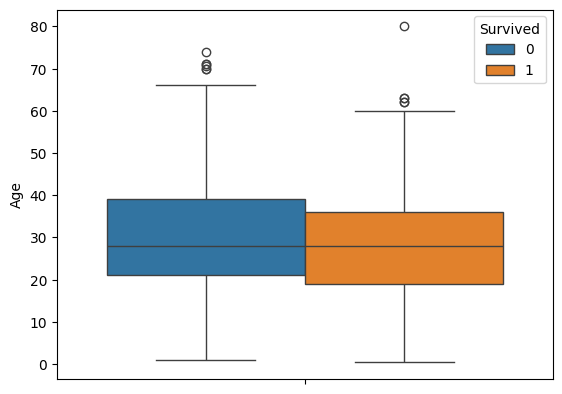

In [43]:
sns.boxplot(y = 'Age', hue = 'Survived' , data = train)
plt.show()

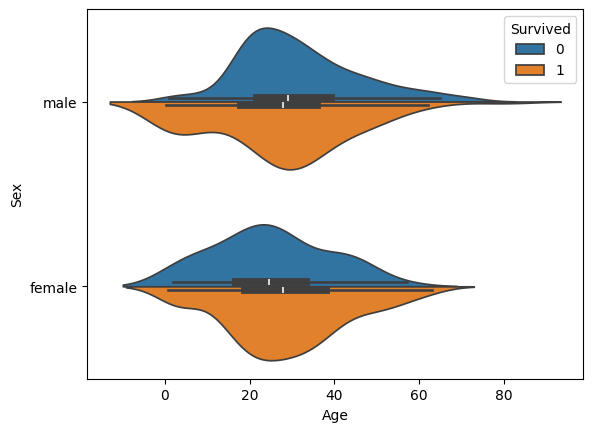

In [46]:
sns.violinplot(x = 'Age', y = 'Sex', hue = 'Survived' , split = True, data = train)
plt.show()

In [49]:
train['Survival_class'] = train.Survived.replace([0, 1], ['No', 'Yes'])

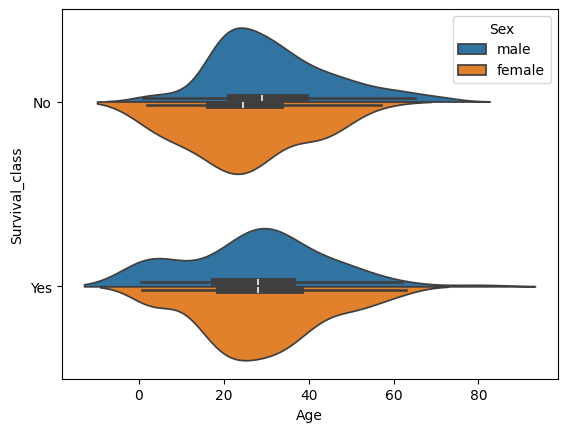

In [50]:
sns.violinplot(x = 'Age', y = 'Survival_class', hue = 'Sex' , split = True, data = train)
plt.show()

### Handling Missing values 

In [54]:
train.Age.mean()

29.69911764705882

In [53]:
train.groupby('Sex')[['Age']].agg(['mean', 'median']).round(1)

Age       
        mean median
Sex                
female  27.9   27.0
male    30.7   29.0

In [55]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [56]:
# extract the title

In [57]:
ex_name = 'Pandey, Mrs. Nimisha'

In [63]:
ex_name.split(" ")[1]

'Mrs.'

In [66]:
train.Name.str.split(" ").str[1].str.replace(".", '')

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [68]:
def get_title(name):
    
    return title
train['Title'] = train.Name.apply(get_title)

In [99]:
train['Title']  = train.Name.str.split("[,.]").str[1].str.strip()

In [100]:
pd.crosstab(train.Sex, train.Title)

Title   Capt  Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  \
Sex                                                                          
female     0    0    0   1         0     1      0       0   182     2    1   
male       1    2    1   6         1     0      2      40     0     0    0   

Title    Mr  Mrs  Ms  Rev  Sir  the Countess  
Sex                                           
female    0  125   1    0    0             1  
male    517    0   0    6    1             0

In [101]:
train.Title[0]

'Mr'

In [102]:
train['Age_category'] = ''
train.loc[train.Title.isin(['Capt', 'Col','Don' , 'Jonkheer', 'Major', 'Mr','Rev', 'Sir' ]), 'Age_category'] = 'Adult Males'
train.loc[train.Title.isin(['Lady', 'Mlle','Mme' , 'Mrs', 'Ms', 'the Countess' ]), 'Age_category'] = 'Adult Females'
train.loc[train.Title.isin(['Master' ]), 'Age_category'] = 'Young Males'
train.loc[train.Title.isin(['Miss' ]), 'Age_category'] = 'Young Female'
train.loc[(train.Title == 'Dr' )& (train.Sex == 'female'), 'Age_category'] = 'Adult Females'
train.loc[(train.Title == 'Dr') & (train.Sex == 'male'), 'Age_category'] = 'Adult Males'


In [103]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title   Age_category  
0      0         A/5 21171   7.2500   NaN        S    Mr    Adult Males  
1      0          PC 17599  71.2833   C85        C   Mrs  Adult Females  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss   Young Female  
3      0            113803  53.1000  C123        S   Mrs  Adult Females  
4      0            373450   8.0500   NaN        S    Mr    Adult Males

In [105]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [108]:
train.groupby('Age_category')[['Age']].agg(['mean', lambda x: x.isna().sum() ])

Age           
                    mean <lambda_0>
Age_category                       
Adult Females  35.713043         17
Adult Males    32.984412        120
Young Female   21.773973         36
Young Males     4.574167          4

In [109]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [111]:
train['FamilySize'] = train.SibSp + train.Parch

In [113]:
train['Alone'] = False
train.loc[train['FamilySize'] == 0, 'Alone'] = True

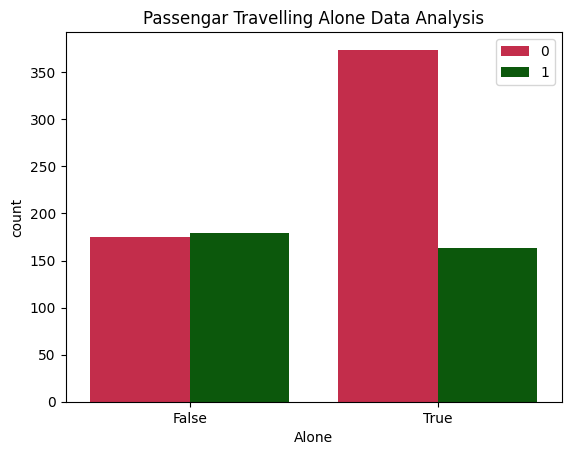

In [114]:
sns.countplot(x = 'Alone', hue = 'Survived', data = train, palette= ['crimson', 'darkgreen'])
plt.legend(bbox_to_anchor= (1,1))
plt.title('Passengar Travelling Alone Data Analysis')
plt.show()

In [117]:
corr_mat = train.corr(numeric_only=True)

In [119]:
sns.heatmap(corr_mat, annot= True)

<Axes: >

drop --> Cabin, sibsp , parch, passenger Id, Title, name